In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# 加载CSV文件


def get_sv(filename):
    train_file = filename + '_train.csv'
    val_file = filename + '_val.csv'
    df_train = pd.read_csv(train_file)
    df_val = pd.read_csv(val_file)
    return df_train, df_val

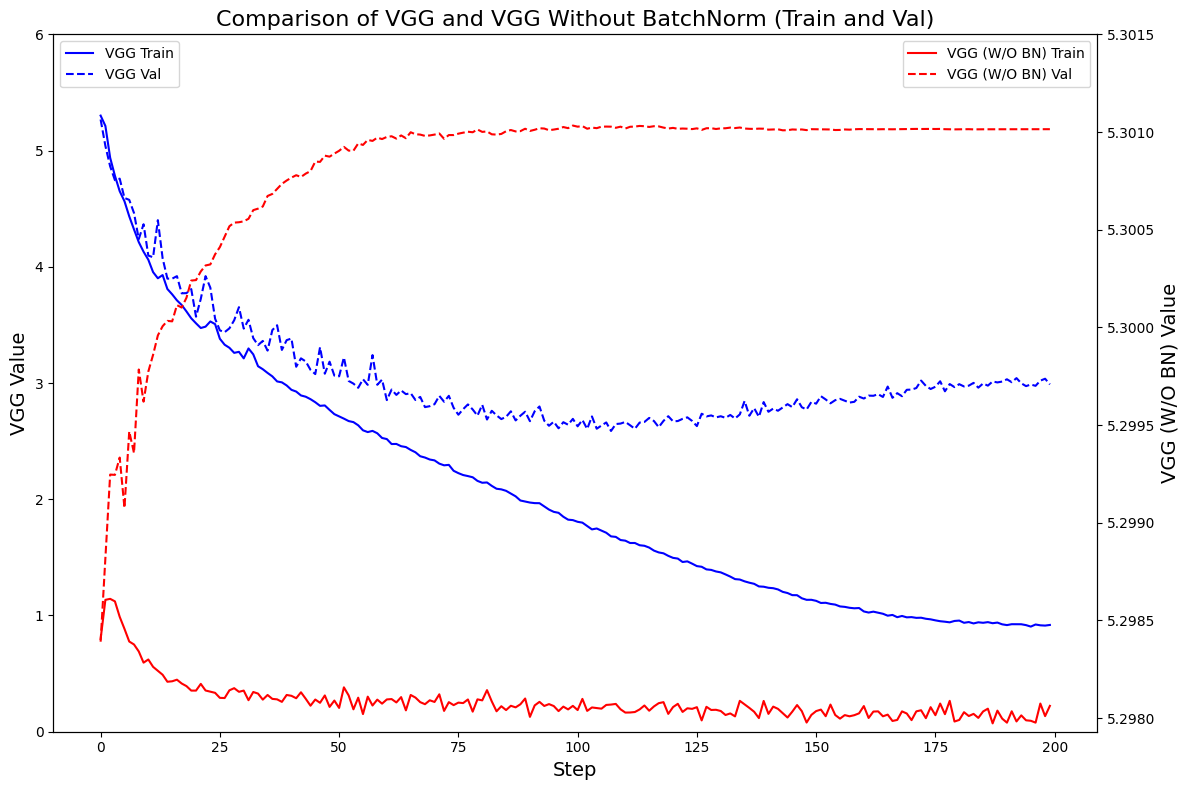

In [ ]:
vgg = 'logs/vgg19_2024_12_08_20_53'
vgg_wonorm = 'logs/vgg19_2024_12_09_11_48'
vgg_train, vgg_val = get_sv(vgg)
vgg_wonorm_train, vgg_wonorm_val = get_sv(vgg_wonorm)

# 创建一个图形
fig, ax1 = plt.subplots(figsize=(12, 8))

# 绘制 VGG 的 train 和 val 数据，使用 ax1 (左侧 Y 轴)
line1_train, = ax1.plot(vgg_train['Step'], vgg_train['Value'], label='VGG Train', color='b', linestyle='-')
line1_val, = ax1.plot(vgg_val['Step'], vgg_val['Value'], label='VGG Val', color='b', linestyle='--')

# 设置 ax1 (VGG) 的标题和标签
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('VGG Value', fontsize=14)
ax1.tick_params(axis='y')
ax1.set_ylim(0, 6)  # 设置VGG的Y轴范围

# 创建 ax2 (右侧 Y 轴)
ax2 = ax1.twinx()

# 绘制 VGG+NoNorm 的 train 和 val 数据，使用 ax2 (右侧 Y 轴)
line2_train, = ax2.plot(vgg_wonorm_train['Step'], vgg_wonorm_train['Value'], label='VGG (W/O BN) Train', color='r', linestyle='-')
line2_val, = ax2.plot(vgg_wonorm_val['Step'], vgg_wonorm_val['Value'], label='VGG (W/O BN) Val', color='r', linestyle='--')

# 设置 ax2 (VGG+NoNorm) 的标签
ax2.set_ylabel('VGG (W/O BN) Value', fontsize=14)
ax2.tick_params(axis='y')
ax2.set_ylim(5.29793, 5.3015)  # 设置VGG+NoNorm的Y轴范围

# 设置图表的标题
plt.title('Comparison of VGG and VGG Without BatchNorm (Train and Val)', fontsize=16)

# 手动设置图例，分别显示左右 Y 轴的标签
ax1.legend(handles=[line1_train, line1_val], loc='upper left')
ax2.legend(handles=[line2_train, line2_val], loc='upper right')

# 显示图形
fig.tight_layout()  # 自动调整布局，以避免标签被遮挡
plt.show()


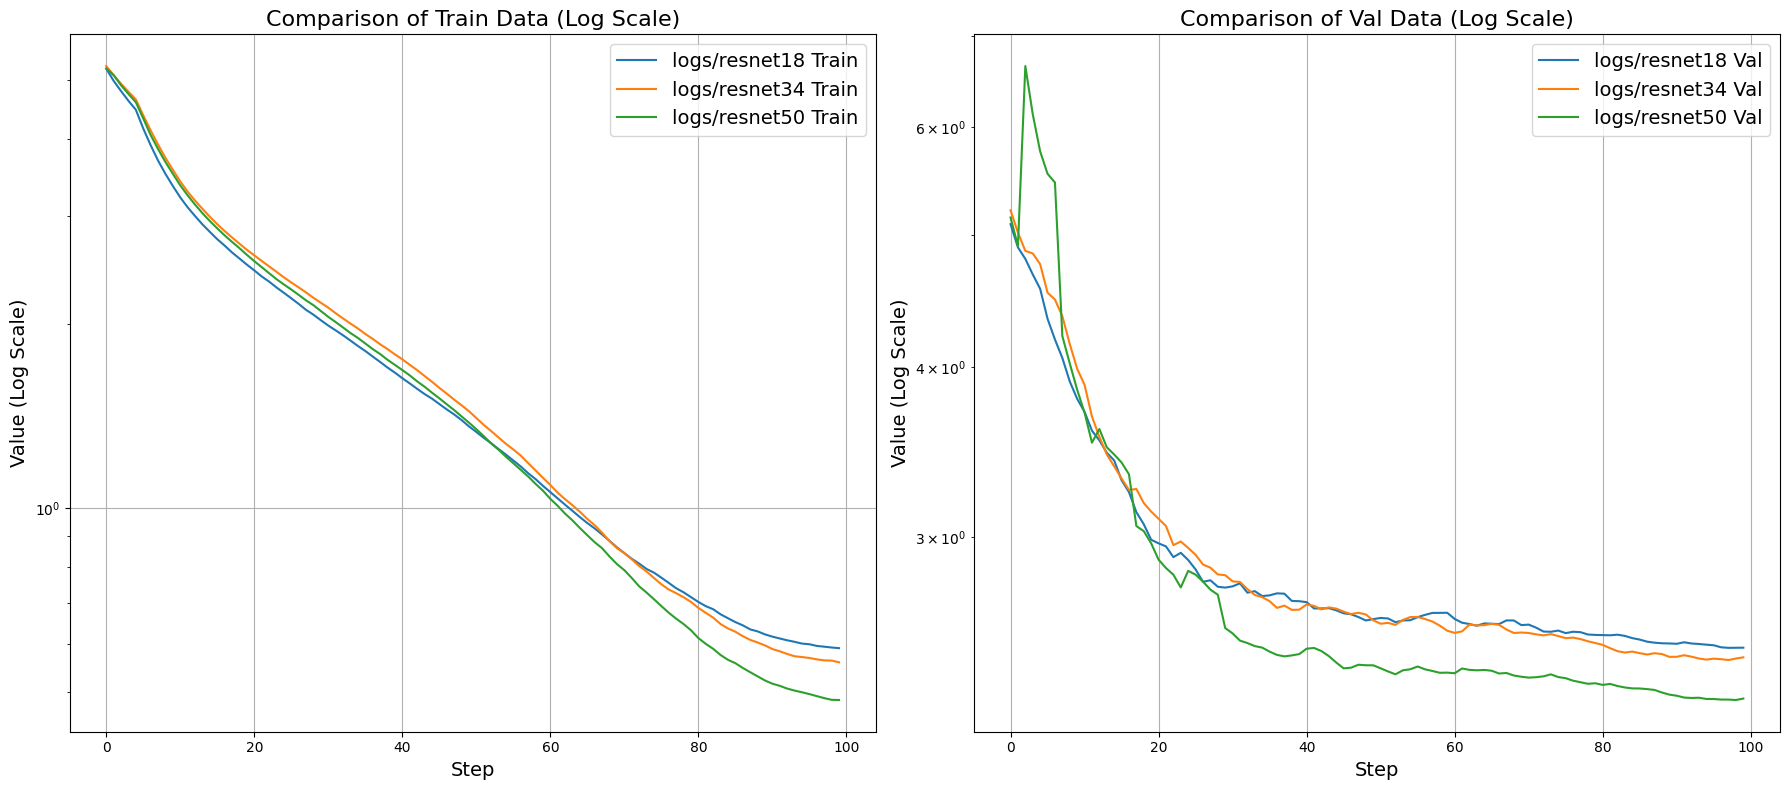

In [26]:
# 定义路径前缀
models = [
    'logs/resnet18_2024_12_07_23_58',
    'logs/resnet34_2024_12_08_02_39',
    'logs/resnet50_2024_12_09_13_40',
    # 'logs/resnext50_2024_12_09_04_44'
]

# 获取每个模型的数据
train_data = {}
val_data = {}
for model in models:
    train_data[model], val_data[model] = get_sv(model)
# 获取每个模型的数据
train_data = {}
val_data = {}
for model in models:
    train_data[model], val_data[model] = get_sv(model)

# 定义一个简单的移动平均函数
def moving_average(data, window_size=5):
    return data.rolling(window=window_size, min_periods=1).mean()

# 创建一个图形，包含两个子图
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 子图1: 对比 Train 数据
axes[0].set_title('Comparison of Train Data (Log Scale)', fontsize=16)
for model in models:
    # 对数据进行平滑化
    smoothed_train = moving_average(train_data[model]['Value'], window_size=5)  # 使用窗口大小为5的移动平均
    axes[0].plot(train_data[model]['Step'], smoothed_train, label=f'{model.split("_")[0]} Train')
axes[0].set_xlabel('Step', fontsize=14)
axes[0].set_ylabel('Value (Log Scale)', fontsize=14)
axes[0].set_yscale('log')  # 设置Y轴为对数尺度
axes[0].legend(fontsize=14)  # 设置图例标签字体大小
axes[0].grid(True)

# 子图2: 对比 Val 数据
axes[1].set_title('Comparison of Val Data (Log Scale)', fontsize=16)
for model in models:
    # 对数据进行平滑化
    smoothed_val = moving_average(val_data[model]['Value'], window_size=5)  # 使用窗口大小为5的移动平均
    axes[1].plot(val_data[model]['Step'], smoothed_val, label=f'{model.split("_")[0]} Val')
axes[1].set_xlabel('Step', fontsize=14)
axes[1].set_ylabel('Value (Log Scale)', fontsize=14)
axes[1].set_yscale('log')  # 设置Y轴为对数尺度
axes[1].legend(fontsize=14)  # 设置图例标签字体大小
axes[1].grid(True)

# 调整布局
fig.tight_layout()

# 显示图形
plt.show()

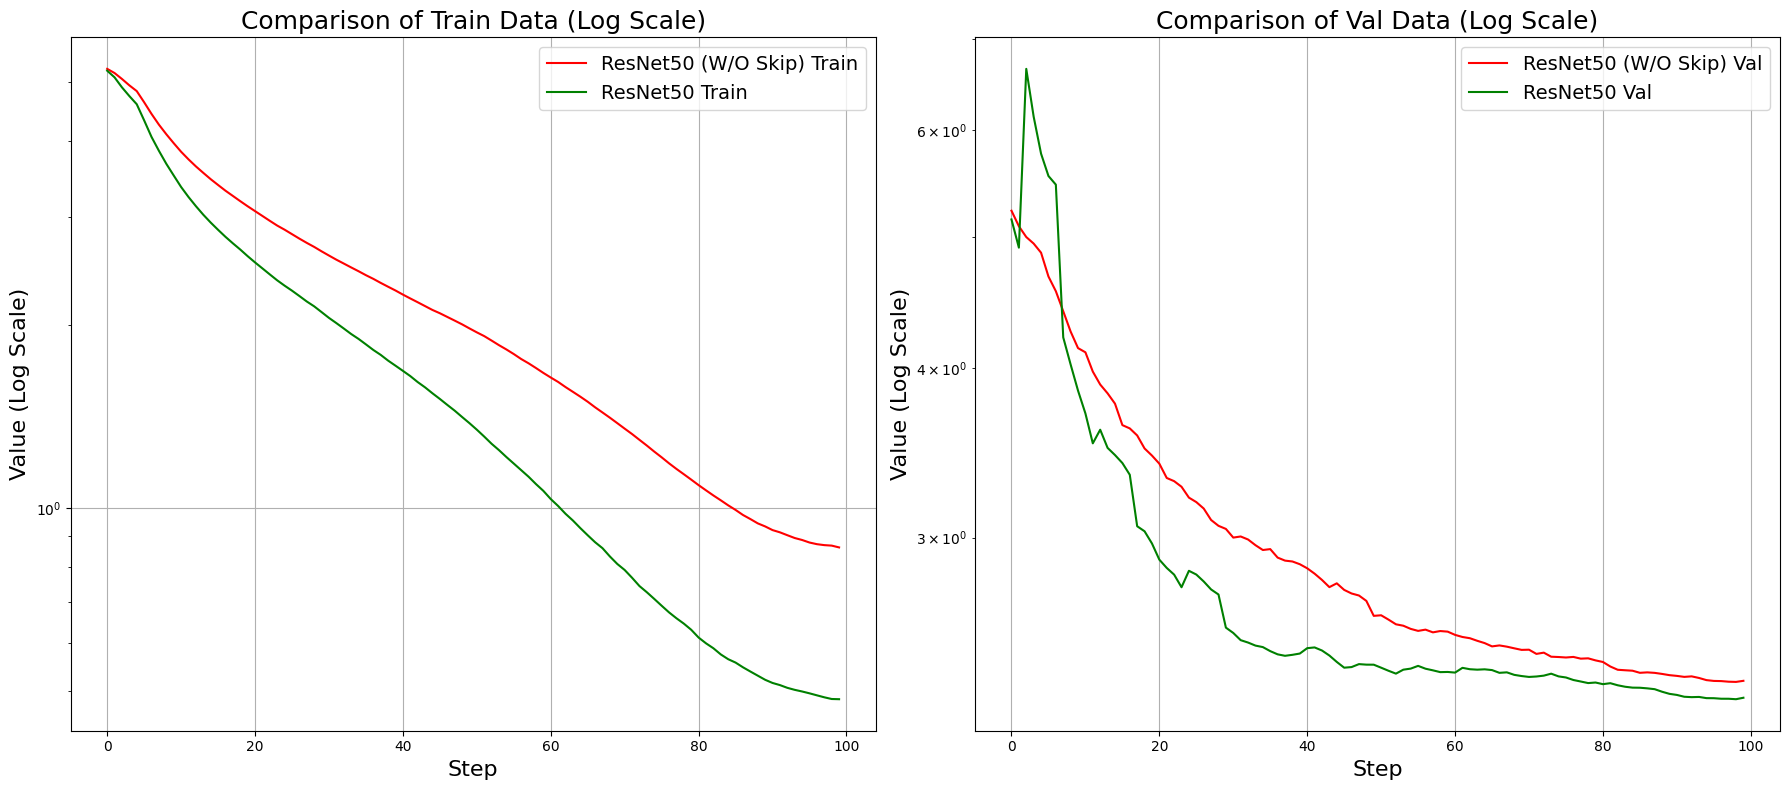

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义路径前缀
models = [
    'logs/resnet50_2024_12_09_14_53_noskip',  # 不含 Skip 连接
    'logs/resnet50_2024_12_09_13_40',         # 含 Skip 连接
]

labels = ['ResNet50 (W/O Skip)','ResNet50']

colors = ['r', 'g']

# 获取每个模型的数据
train_data = {}
val_data = {}
for model in models:
    train_data[model], val_data[model] = get_sv(model)

# 定义滑动平均函数
def moving_average(data, window_size=5):
    return data.rolling(window=window_size, min_periods=1).mean()

# 创建一个图形，包含两个子图
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 子图1: 对比 Train 数据
axes[0].set_title('Comparison of Train Data (Log Scale)', fontsize=18)  # 设置标题字体大小
for i,model in enumerate(models):
    # 对数据进行滑动平均平滑化
    smoothed_train_ma = moving_average(train_data[model]['Value'], window_size=5)
    axes[0].plot(train_data[model]['Step'], smoothed_train_ma, label=f'{labels[i]} Train', color=colors[i])
axes[0].set_xlabel('Step', fontsize=16)  # 设置X轴标签字体大小
axes[0].set_ylabel('Value (Log Scale)', fontsize=16)  # 设置Y轴标签字体大小
axes[0].set_yscale('log')  # 设置Y轴为对数尺度
axes[0].legend(fontsize=14)  # 设置图例标签字体大小
axes[0].grid(True)

# 子图2: 对比 Val 数据
axes[1].set_title('Comparison of Val Data (Log Scale)', fontsize=18)  # 设置标题字体大小
for i,model in enumerate(models):
    # 对数据进行滑动平均平滑化
    smoothed_val_ma = moving_average(val_data[model]['Value'], window_size=5)
    axes[1].plot(val_data[model]['Step'], smoothed_val_ma, label=f'{labels[i]} Val', color=colors[i])
axes[1].set_xlabel('Step', fontsize=16)  # 设置X轴标签字体大小
axes[1].set_ylabel('Value (Log Scale)', fontsize=16)  # 设置Y轴标签字体大小
axes[1].set_yscale('log')  # 设置Y轴为对数尺度
axes[1].legend(fontsize=14)  # 设置图例标签字体大小
axes[1].grid(True)

# 调整布局
fig.tight_layout()

# 显示图形
plt.show()


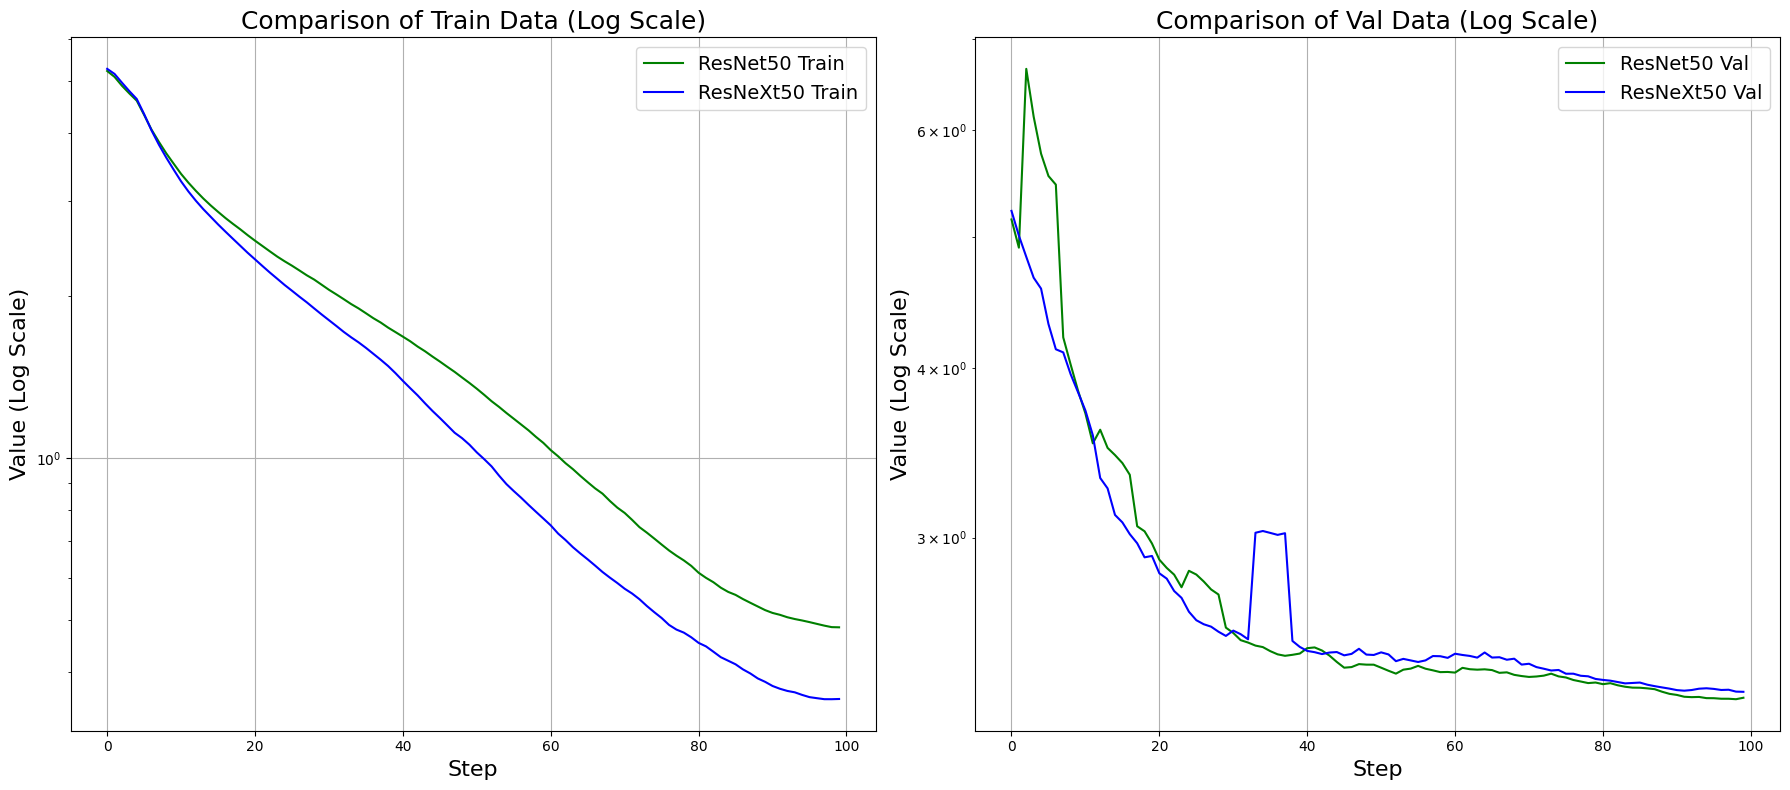

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义路径前缀
models = [
    'logs/resnet50_2024_12_09_13_40',         # 含 Skip 连接
    'logs/resnext50_2024_12_09_04_44'

]

labels = ['ResNet50','ResNeXt50']

colors = ['g', 'b']

# 获取每个模型的数据
train_data = {}
val_data = {}
for model in models:
    train_data[model], val_data[model] = get_sv(model)

# 定义滑动平均函数
def moving_average(data, window_size=5):
    return data.rolling(window=window_size, min_periods=1).mean()

# 创建一个图形，包含两个子图
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 子图1: 对比 Train 数据
axes[0].set_title('Comparison of Train Data (Log Scale)', fontsize=18)  # 设置标题字体大小
for i,model in enumerate(models):
    # 对数据进行滑动平均平滑化
    smoothed_train_ma = moving_average(train_data[model]['Value'], window_size=5)
    axes[0].plot(train_data[model]['Step'], smoothed_train_ma, label=f'{labels[i]} Train', color=colors[i])
axes[0].set_xlabel('Step', fontsize=16)  # 设置X轴标签字体大小
axes[0].set_ylabel('Value (Log Scale)', fontsize=16)  # 设置Y轴标签字体大小
axes[0].set_yscale('log')  # 设置Y轴为对数尺度
axes[0].legend(fontsize=14)  # 设置图例标签字体大小
axes[0].grid(True)

# 子图2: 对比 Val 数据
axes[1].set_title('Comparison of Val Data (Log Scale)', fontsize=18)  # 设置标题字体大小
for i,model in enumerate(models):
    # 对数据进行滑动平均平滑化
    smoothed_val_ma = moving_average(val_data[model]['Value'], window_size=5)
    axes[1].plot(val_data[model]['Step'], smoothed_val_ma, label=f'{labels[i]} Val', color=colors[i])
axes[1].set_xlabel('Step', fontsize=16)  # 设置X轴标签字体大小
axes[1].set_ylabel('Value (Log Scale)', fontsize=16)  # 设置Y轴标签字体大小
axes[1].set_yscale('log')  # 设置Y轴为对数尺度
axes[1].legend(fontsize=14)  # 设置图例标签字体大小
axes[1].grid(True)

# 调整布局
fig.tight_layout()

# 显示图形
plt.show()


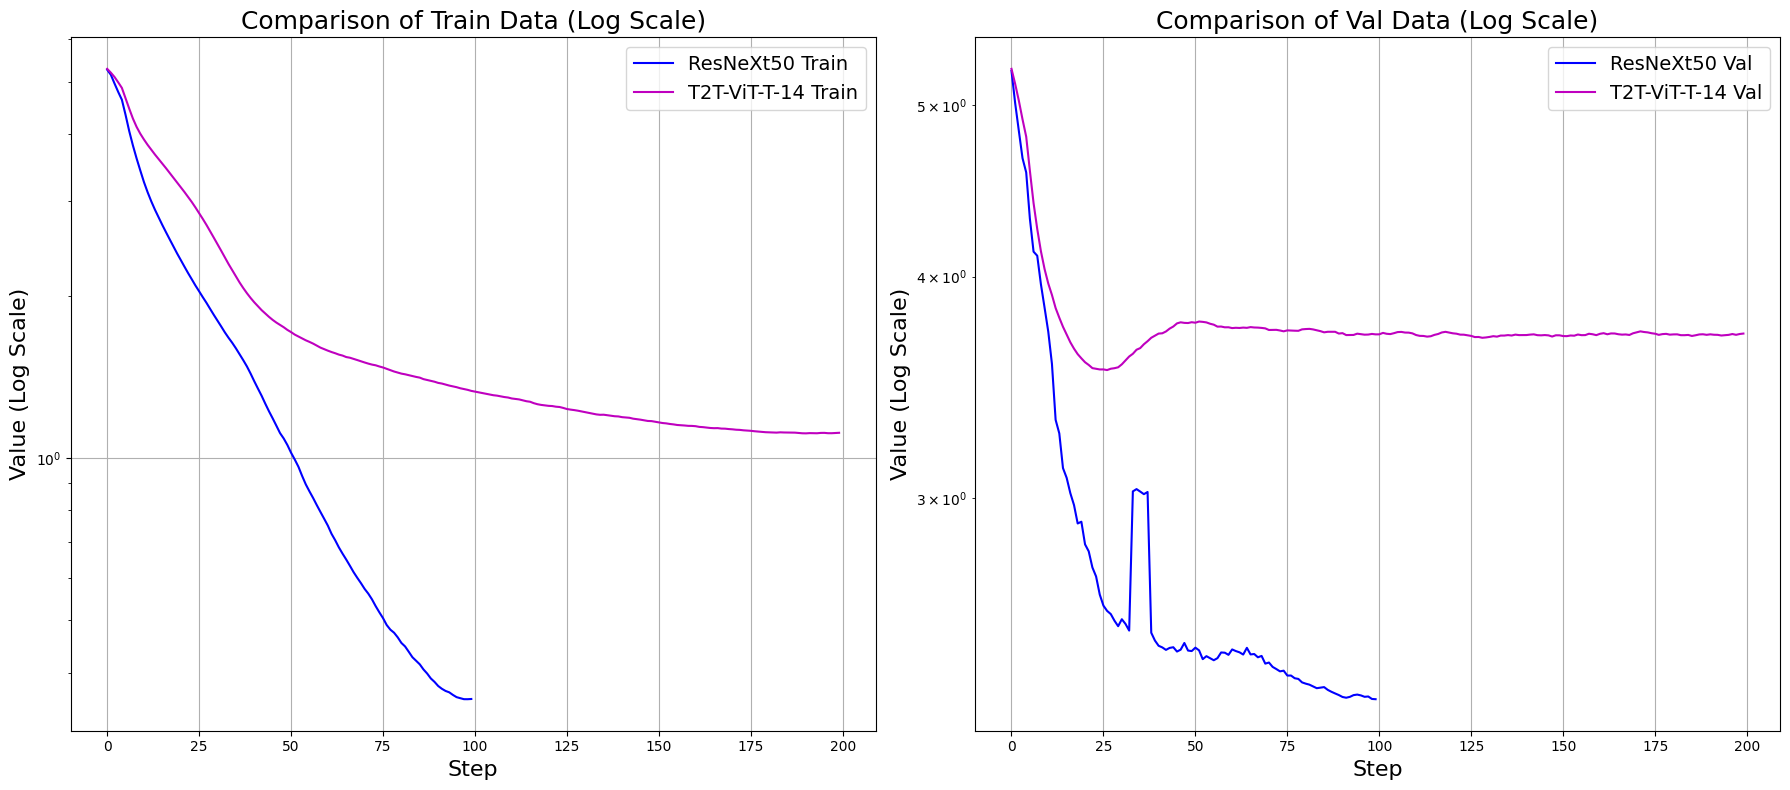

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义路径前缀
models = [
    'logs/resnext50_2024_12_09_04_44',
    'logs/t2t_vit_t_14_2024_12_09_02_45'
]

labels = ['ResNeXt50','T2T-ViT-T-14']

colors = ['b', 'm']

# 获取每个模型的数据
train_data = {}
val_data = {}
for model in models:
    train_data[model], val_data[model] = get_sv(model)

# 定义滑动平均函数
def moving_average(data, window_size=5):
    return data.rolling(window=window_size, min_periods=1).mean()

# 创建一个图形，包含两个子图
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 子图1: 对比 Train 数据
axes[0].set_title('Comparison of Train Data (Log Scale)', fontsize=18)  # 设置标题字体大小
for i,model in enumerate(models):
    # 对数据进行滑动平均平滑化
    smoothed_train_ma = moving_average(train_data[model]['Value'], window_size=5)
    axes[0].plot(train_data[model]['Step'], smoothed_train_ma, label=f'{labels[i]} Train', color=colors[i])
axes[0].set_xlabel('Step', fontsize=16)  # 设置X轴标签字体大小
axes[0].set_ylabel('Value (Log Scale)', fontsize=16)  # 设置Y轴标签字体大小
axes[0].set_yscale('log')  # 设置Y轴为对数尺度
axes[0].legend(fontsize=14)  # 设置图例标签字体大小
axes[0].grid(True)

# 子图2: 对比 Val 数据
axes[1].set_title('Comparison of Val Data (Log Scale)', fontsize=18)  # 设置标题字体大小
for i,model in enumerate(models):
    # 对数据进行滑动平均平滑化
    smoothed_val_ma = moving_average(val_data[model]['Value'], window_size=5)
    axes[1].plot(val_data[model]['Step'], smoothed_val_ma, label=f'{labels[i]} Val', color=colors[i])
axes[1].set_xlabel('Step', fontsize=16)  # 设置X轴标签字体大小
axes[1].set_ylabel('Value (Log Scale)', fontsize=16)  # 设置Y轴标签字体大小
axes[1].set_yscale('log')  # 设置Y轴为对数尺度
axes[1].legend(fontsize=14)  # 设置图例标签字体大小
axes[1].grid(True)

# 调整布局
fig.tight_layout()

# 显示图形
plt.show()
